In [1]:
# LBP
    # replace value in 3x3 window with 1 (center > pixel) or 0
    # make a number (biggest value in corner upper left)
    # replace center 
    # invariant la schimbarile MONOTONE 

# LBP uniform (tranzitii de biti)
    # de la 256 val -> 59 (am redus dim descriptorului)


In [2]:
# i7 = img[0:h-2, 0:w-2]
# ic = img[1:h-1, 1:w-1] (pentru centrul, (1,1) in imaginea mare)
# i7 = i7 > ic (matrice de tip boolean)
# LBP = i7 * 2**7 + .... + ....

In [3]:
import numpy as np
from skimage import io,color
import matplotlib.pyplot as plt
import time
import pdb

In [4]:
#calculez descriptorul varianta lunga
def lbp(window):
    
    if window.shape != (3, 3):
        raise ValueError("The input matrix must be a 3x3 matrix.")
    
    center = window[1, 1]  # Center element

    # Extract edge elements in a clockwise manner
    edge_elements = [
        window[0, 0], window[0, 1], window[0, 2],  # Top row
        window[1, 2],                              # Right column
        window[2, 2], window[2, 1], window[2, 0],  # Bottom row (reversed)
        window[1, 0]                               # Left column
    ]
    #PARAMETERS: fereastra
    #RETURN: valoarea LBP asociata ferestrei
    
    #pun conditiile intre central si vecini
    lbp = [(1 if val >= center else 0) for val in edge_elements]

    #transform din binar in zecimal
    lbp_binary = ''.join(map(str, lbp))
    lbp_decimal = int(lbp_binary, 2)

    return edge_elements, lbp_binary, lbp_decimal

In [5]:
#varianta optimiazta de LBP
def lbp_optimizat(img):
    h, w = np.shape(img)
    I = []
    I_matrice = []

    # definirea celor 8 imagini shiftate
    I7 = img[0:h-2, 0:w-2]
    I.append(I7)
    I6 = img[0:h-2, 1:w-1]
    I.append(I6)
    I5 = img[0:h-2, 2:w]
    I.append(I5)
    I4 = img[1:h-1, 2:w]
    I.append(I4)
    I3 = img[2:h, 2:w]
    I.append(I3)
    I2 = img[2:h, 1:w-1]
    I.append(I2)
    I1 = img[2:h, 0:w-2]
    I.append(I1)
    I0 = img[1:h-1, 0:w-2]
    I.append(I0)

    Ic = img[1:h-1, 1:w-1]  

    for i in range(8):
        I_matrice.append(I[i] >= Ic)

    LBP = np.zeros_like(Ic, dtype=np.uint8)

 
    for i in range(8):
        LBP += (2**(7-i)) * I_matrice[i].astype(np.uint8)

    return LBP

In [6]:
def lbp_optimizat_v2(img):
    img_lbp = np.zeros((img.shape[0] - 2, img.shape[1] - 2), dtype=np.uint8)
    centru = img[1:-1, 1:-1]
    cod = np.zeros_like(img_lbp, dtype=np.uint8)

    cod |= ((img[:-2, :-2] >= centru).astype(np.uint8) << 7)  # sus-stanga
    cod |= ((img[:-2, 1:-1] >= centru).astype(np.uint8) << 6)  # sus
    cod |= ((img[:-2, 2:] >= centru).astype(np.uint8) << 5)    # sus-dreapta
    cod |= ((img[1:-1, 2:] >= centru).astype(np.uint8) << 4)   # dreapta
    cod |= ((img[2:, 2:] >= centru).astype(np.uint8) << 3)     # jos-dreapta
    cod |= ((img[2:, 1:-1] >= centru).astype(np.uint8) << 2)   # jos
    cod |= ((img[2:, :-2] >= centru).astype(np.uint8) << 1)    # jos-stanga
    cod |= ((img[1:-1, :-2] >= centru).astype(np.uint8) << 0)  # stanga

    img_lbp = cod
    return img_lbp

In [7]:
def lbp_optimizat_v3(img):
    h, w = img.shape
    LBP = np.zeros((h - 2, w - 2), dtype=np.uint8)

    # Create a mask for the center pixel
    center_mask = img[1:h-1, 1:w-1]

    # Calculate LBP values using bitwise operations
    LBP |= ((img[0:h-2, 0:w-2] >= center_mask) << 7)  # Top-left
    LBP |= ((img[0:h-2, 1:w-1] >= center_mask) << 6)  # Top-center
    LBP |= ((img[0:h-2, 2:w] >= center_mask) << 5)    # Top-right
    LBP |= ((img[1:h-1, 2:w] >= center_mask) << 4)    # Center-right
    LBP |= ((img[2:h, 2:w] >= center_mask) << 3)      # Bottom-right
    LBP |= ((img[2:h, 1:w-1] >= center_mask) << 2)    # Bottom-center
    LBP |= ((img[2:h, 0:w-2] >= center_mask) << 1)    # Bottom-left
    LBP |= ((img[1:h-1, 0:w-2] >= center_mask) << 0)  # Center-left

    return LBP

In [8]:
matrice = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

edge_elements, lbp_binary, lbp_decimal = lbp(matrice)

print("Edge elements (clockwise):", edge_elements)
print("LBP binary:", lbp_binary)
print("LBP decimal:", lbp_decimal)

Edge elements (clockwise): [np.int64(1), np.int64(2), np.int64(3), np.int64(6), np.int64(9), np.int64(8), np.int64(7), np.int64(4)]
LBP binary: 00011110
LBP decimal: 30


Text(0.5, 1.0, 'LBP Image')

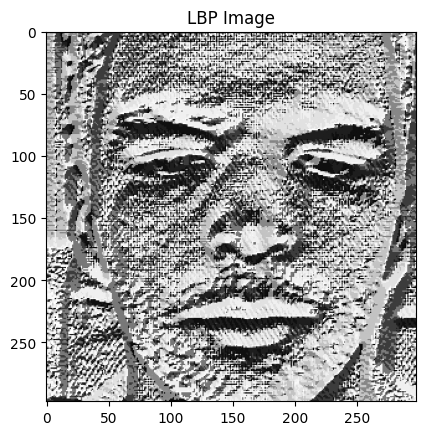

In [9]:
img = io.imread('Mari/BioID_F1_1.jpg')
img = color.rgb2gray(img)  # Convert to grayscale if needed

lbp_img = lbp_optimizat(img)
plt.imshow(lbp_img, cmap='gray')
plt.title('LBP Image')

In [10]:
## LAB 6

# citim poza, transformam grayscale
# step = H//7
#lista_poze =
#for k,poza in enum(lista_poze):
# for i in range(0, H, step):
#    for j in range(0, W, step):
#       fer = img[i:i+step, j:j+step]
#       lbp = lbp_optimizat(fer)
#       hist = np.histogram(lbp, bins=256, range=(0, 256))[0]* * lbp_mask[i//step, j//step]
#       list_hist.append(hist)
# rez = np.array(list_hist)
# descr_lbp[k,:]

# matrice de distante
# distanta_euclidiana = np.sqrt(np.sum((descr_lbp[k,:] - descr_lbp[l,:])**2)) in for k, l


In [11]:
import numpy as np
from skimage import io,color
import matplotlib.pyplot as plt
import os
import math
# from lbp_descriptor import lbp_optimizat

In [12]:
def eucdist(vector1, vector2):
    return np.sqrt(np.sum((vector1 - vector2) ** 2))

Distanta euclidiana dintre 0 si 0: 0.0
Distanta euclidiana dintre 0 si 1: 2151.3154115563807
Distanta euclidiana dintre 0 si 2: 2795.1829993758906
Distanta euclidiana dintre 0 si 3: 2182.4014296183
Distanta euclidiana dintre 0 si 4: 2909.1191106587576
Distanta euclidiana dintre 0 si 5: 2108.3363109333386
Distanta euclidiana dintre 0 si 6: 2894.916579108973
Distanta euclidiana dintre 0 si 7: 1210.1338768913133
Distanta euclidiana dintre 0 si 8: 2390.3309394307726
Distanta euclidiana dintre 0 si 9: 3084.583926561247
Distanta euclidiana dintre 0 si 10: 1262.8697478362526
Distanta euclidiana dintre 0 si 11: 2323.0553157426107
Distanta euclidiana dintre 1 si 0: 2151.3154115563807
Distanta euclidiana dintre 1 si 1: 0.0
Distanta euclidiana dintre 1 si 2: 2939.45947412105
Distanta euclidiana dintre 1 si 3: 926.5095790114639
Distanta euclidiana dintre 1 si 4: 2598.583075447079
Distanta euclidiana dintre 1 si 5: 1060.0235846432852
Distanta euclidiana dintre 1 si 6: 2207.1053441102445
Distanta eu

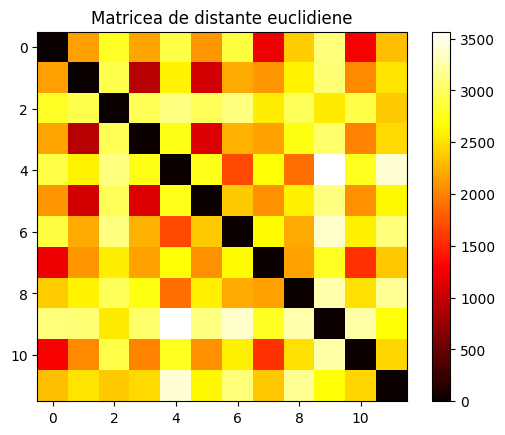

In [13]:
lbp_mask=np.array([[2,1,1,1,1,1,2],
    [2,4,4,1,4,4,2],
    [1,1,1,0,1,1,1],
    [0,1,1,0,1,1,0],
    [0,1,1,1,1,1,0],
    [0,1,1,2,1,1,0],
    [0,1,1,1,1,1,0]])

# citim pozele din director, transformam grayscale
poze = os.listdir('Mari')
descriptori_lbp=np.zeros((len(poze),256*49))

for k, poza in enumerate(poze):
    img = io.imread(os.path.join('Mari', poza))
    img = color.rgb2gray(img)  # Convert to grayscale if needed
    H, W = img.shape
    step = H//7
    list_hist = []
    
    for i in range(0, H-step, step):
        for j in range(0, W-step, step):
            fer = img[i:i+step, j:j+step]
            lbp = lbp_optimizat(fer)
            hist = np.histogram(lbp, bins=256, range=(0, 256))[0] * lbp_mask[i//step, j//step]
            list_hist.append(hist)
    
    descr_lbp = np.array(list_hist)
    descriptori_lbp[k,:] = descr_lbp.flatten()

#initializez matrica de distante  
distanta = np.zeros((12, 12))

# calculez distanta euclidiana intre toti descriptorii, inclusiv cei de la img identice
for k in range(12):
    for l in range(12):
        distanta[k, l] = eucdist(descriptori_lbp[k,:], descriptori_lbp[l,:])
        print(f"Distanta euclidiana dintre {k} si {l}: {distanta[k, l]}")

# afisez matricea de distante
plt.imshow(distanta, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Matricea de distante euclidiene')
plt.show()



In [14]:
# Part 3
nr_fete = 0

# np.argsort(matrice_distante, axis=1)
# selectez doar primele 3 coloane (indicii)
# algoritm automat care sa detecteze daca din 3 in 3 sunt imagini similare
nr_imagini = len(poze)
sorted_indices = np.argsort(distanta, axis=1)
print(sorted_indices)

corect = 0

for i in range(nr_imagini):
    cei_mai_apropiati = sorted_indices[i,1:3]
    clase_corecte = i//3
    clase_vecini = cei_mai_apropiati//3
    corect += np.sum(clase_vecini == clase_corecte)

indici_sortati = np.argsort(distanta, axis=1)
print(indici_sortati)
nr_fete = 0
for i in range(nr_imagini):
    cei_mai_apropiati = indici_sortati[i, 1:3]
    clase_corecte = i // 3
    clase_vecini = cei_mai_apropiati // 3
    if all(clase_corecte == clase_vecini):
    	nr_fete += 1

print('Nr de fete metoda 1 este ', corect )
print('Nr de fete metoda 2 este ', nr_fete )

[[ 0  7 10  5  1  3 11  8  2  6  4  9]
 [ 1  3  5 10  7  0  6 11  8  4  2  9]
 [ 2 11  9  7  0 10  1  3  5  8  4  6]
 [ 3  1  5 10  7  0  6 11  8  4  2  9]
 [ 4  6  8  1  7  3  5 10  0  2 11  9]
 [ 5  1  3  7 10  0  6  8 11  4  2  9]
 [ 6  4  8  1  3  5 10  7  0 11  2  9]
 [ 7  0 10  5  1  3  8 11  2  6  4  9]
 [ 8  4  7  6  0 10  5  1  3  2 11  9]
 [ 9  2 11  7  3  1  0  5 10  8  6  4]
 [10  0  7  3  1  5 11  8  6  4  2  9]
 [11  0  7  2 10  3  1  5  9  6  8  4]]
[[ 0  7 10  5  1  3 11  8  2  6  4  9]
 [ 1  3  5 10  7  0  6 11  8  4  2  9]
 [ 2 11  9  7  0 10  1  3  5  8  4  6]
 [ 3  1  5 10  7  0  6 11  8  4  2  9]
 [ 4  6  8  1  7  3  5 10  0  2 11  9]
 [ 5  1  3  7 10  0  6  8 11  4  2  9]
 [ 6  4  8  1  3  5 10  7  0 11  2  9]
 [ 7  0 10  5  1  3  8 11  2  6  4  9]
 [ 8  4  7  6  0 10  5  1  3  2 11  9]
 [ 9  2 11  7  3  1  0  5 10  8  6  4]
 [10  0  7  3  1  5 11  8  6  4  2  9]
 [11  0  7  2 10  3  1  5  9  6  8  4]]
Nr de fete metoda 1 este  5
Nr de fete metoda 2 este  0


[[ 0  7 10  5  1  3 11  8  2  6  4  9]
 [ 1  3  5 10  7  0  6 11  8  4  2  9]
 [ 2 11  9  7  0 10  1  3  5  8  4  6]
 [ 3  1  5 10  7  0  6 11  8  4  2  9]
 [ 4  6  8  1  7  3  5 10  0  2 11  9]
 [ 5  1  3  7 10  0  6  8 11  4  2  9]
 [ 6  4  8  1  3  5 10  7  0 11  2  9]
 [ 7  0 10  5  1  3  8 11  2  6  4  9]
 [ 8  4  7  6  0 10  5  1  3  2 11  9]
 [ 9  2 11  7  3  1  0  5 10  8  6  4]
 [10  0  7  3  1  5 11  8  6  4  2  9]
 [11  0  7  2 10  3  1  5  9  6  8  4]]
Nr de fete este  5


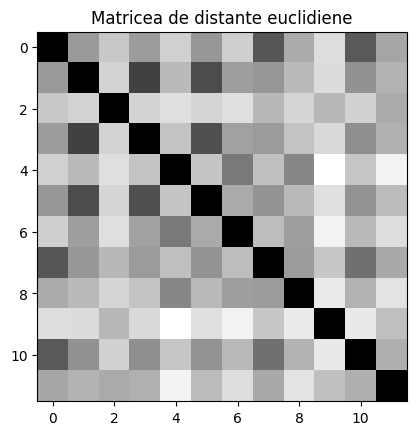

In [16]:
import numpy as np
from skimage import io,color
import matplotlib.pyplot as plt
import os
import math
import pdb


def lbp_optimizat(img):
    h, w = np.shape(img)
    I = []
    I_matrice = []

    # definirea celor 8 imagini shiftate
    I7 = img[0:h-2, 0:w-2]
    I.append(I7)
    I6 = img[0:h-2, 1:w-1]
    I.append(I6)
    I5 = img[0:h-2, 2:w]
    I.append(I5)
    I4 = img[1:h-1, 2:w]
    I.append(I4)
    I3 = img[2:h, 2:w]
    I.append(I3)
    I2 = img[2:h, 1:w-1]
    I.append(I2)
    I1 = img[2:h, 0:w-2]
    I.append(I1)
    I0 = img[1:h-1, 0:w-2]
    I.append(I0)

    Ic = img[1:h-1, 1:w-1]

    for i in range(8):
        I_matrice.append(I[i] >= Ic)

    LBP = np.zeros_like(Ic, dtype=np.uint8)


    for i in range(8):
        LBP += (2**(7-i)) * I_matrice[i].astype(np.uint8)

    return LBP


def eucdist(vec1, vec2):
    
    #PARAMETERS: cei 2 vectori
    #RETURN: distanta
    
    vec1 = np.array(vec1)
    vec2 = np.array(vec2)
    return np.linalg.norm(vec1 - vec2)
    
lbp_mask=np.array([[2,1,1,1,1,1,2],
    [2,4,4,1,4,4,2],
    [1,1,1,0,1,1,1],
    [0,1,1,0,1,1,0],
    [0,1,1,1,1,1,0],
    [0,1,1,2,1,1,0],
    [0,1,1,1,1,1,0]])

#extrage poze cu os.listdir('path')




lista_poze = os.listdir('Mari')
#parcurge pozele rand pe rand
#citeste,tranf in gray
nr_imagini = len(lista_poze)
#initializarea matricii de descriptori
descriptori_lbp=np.zeros((nr_imagini, 49 * 256))

for k, poza in enumerate(lista_poze):
    im=io.imread(os.path.join('Mari',poza))
    #plt.figure(), plt.imshow(im), plt.show()
    im=color.rgb2gray(im)
#initializez lista in care calculez descritorii
#calculez pasul pt impartirea in 7x7 ferestre
    lista_histograma_fereastra=[]
    H,W=np.shape(im)
    step=H//7
    for i in range(0,H-step,step):
        for j in range(0,W-step,step):
    #parcurg imaginea pe blocuri(7x7)
    
            #decupez fiecare ferastra din cele 49
            fereastra=im[i:i+step, j:j+step]
            fer_LBP=lbp_optimizat(fereastra)
            #fer_LBP=fer_LBP*lbp_mask
          
            #aplic LBP pe fereastra curenta
            
            #calculez histograma ferestrei curente si o inmultesc cu masca
            #folositi np.histogram 256 de bins
            hist=np.histogram(fer_LBP,bins=256,range=(0,256))[0]*lbp_mask[i//step, j//step]
            #pun histograma in lista
            lista_histograma_fereastra.append(hist)
    
    #transform lista de histograme in array
    
    #pun hostogramele concatenate pe linia corespunzatoare imaginii in
    #descriptori_lbp, cel mai simplu este sa folositi flatten() decat 
    #functii de concatenare propriu zise      
    rez=np.array(lista_histograma_fereastra)
    descriptori_lbp[k,:]=rez.flatten()

#initializez matrica de distante    
distante=np.zeros([12,12])

#calculez dist euclidiana intre toti descritorii asociati imaginilor
#inclusiv intre aceeasi descriptori
#treb sa obtin o mat care are pe diag principala 0
for i in range(nr_imagini):
    for j in range(nr_imagini):
        distante[i, j] = eucdist(descriptori_lbp[i], descriptori_lbp[j])

nr_fete=0
plt.imshow(distante, cmap="gray")
plt.title('Matricea de distante euclidiene')
#vreau sa calculez cate fete imi recunoaste
#logica=> intre descritorii asociati pozelor care tin de aceeasi persoana
#ar trebui sa am distentele cele mai mici
#folosind matricea de distante treb sa scriu un cod care calculeaza
#cate fete imi recunoaste

#HINT: np.sort(),np.argsort()

sorted_indices = np.argsort(distante, axis=1)
print(sorted_indices)
corect = 0
for i in range(nr_imagini):
    cei_mai_apropiati = sorted_indices[i, 1:3]  
    clase_corecte = i // 3
    clase_vecini = cei_mai_apropiati // 3  
    corect += np.sum(clase_vecini == clase_corecte)

        
print('Nr de fete este ', corect )